In [69]:
import torch
import torchvision
from torchvision import datasets, transforms, models
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import random
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset 
import torch.optim as optim
import scipy.io
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [16]:
save = scipy.io.loadmat('data/fablimit_considered.mat')
input = np.transpose(np.array(save['img']))
output = np.array(save['Gradient'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [74]:
a = torch.tensor([1,2,3,4])

a.reshape(-1,2)

tensor([[1, 2],
        [3, 4]])

In [4]:
print(device)

cpu


In [5]:
howMany = 90000

threshold = 1
bb=np.sqrt(np.sum(np.square(output),axis=1))
inputC = np.delete(input, bb>threshold,axis=0)
outputC = np.delete(output, bb>threshold,axis=0)
print(inputC.shape)



img_test = np.expand_dims(inputC[howMany:120000],1)
grad_test = np.expand_dims(outputC[howMany:120000],1)

inputC=inputC[0:howMany]
outputC=outputC[0:howMany]

print(np.mean(np.abs(outputC)))
print(np.mean(outputC))




(96121, 64)
0.037605848735934234
0.0014718615092791092


In [28]:
inputC[0].shape

(1, 64)

In [27]:
outputC[0].shape

(1, 64)

In [6]:
%run -i "UNet_small_MSE.py"


UNet defined


In [7]:
inputC = np.expand_dims(inputC,1)
outputC = np.expand_dims(outputC,1)
img_train = inputC
grad_train = outputC

print(grad_train.shape)





(90000, 1, 64)


In [8]:
# img_train, asdf, grad_train, asdfwe\
# = train_test_split(inputC, outputC, test_size=0.1, shuffle=True, stratify=None,random_state=34)
 
img_train, img_test, grad_train, grad_test\
= torch.from_numpy(img_train).float(), torch.from_numpy(img_test).float(), torch.from_numpy(grad_train).float(), torch.from_numpy(grad_test).float()


img_train=img_train.to(device)
img_test=img_test.to(device)
grad_train=grad_train.to(device)
grad_test=grad_test.to(device)

ds_train = TensorDataset(img_train, grad_train)
ds_test = TensorDataset(img_test, grad_test)

print(torch.cuda.is_available())


False


In [9]:
test_loader = DataLoader(dataset=ds_test, batch_size=2048, shuffle=True) ###batch_size

In [17]:
saved = UNet()
saved.load_state_dict(torch.load('March29_64_9man_2.pt',map_location=device))
saved.to(device)
test(saved,test_loader)

model = saved

In [65]:
img.shape

torch.Size([2025, 1, 64])

In [77]:
exp = torch.tensor([1,2,3,4])

exp.shape

torch.Size([4])

In [83]:
q = torch.tensor([1,2,3,4,5,6,7,8,9])
q = q.reshape([3,3])
print(q)

print(q.gather(1,torch.tensor(([1],[1],[2]))))

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[2],
        [5],
        [9]])


In [57]:
img[0].reshape(1,1,64)

tensor([[[ 1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1.]]])

In [35]:
model(img)

tensor([[[-0.0770, -0.0822,  0.0207,  ..., -0.0206, -0.0188, -0.0185]],

        [[ 0.0660,  0.0553,  0.0003,  ...,  0.1069,  0.0939,  0.0833]],

        [[-0.0161,  0.0114,  0.1956,  ...,  0.0371,  0.0052, -0.0207]],

        ...,

        [[-0.1186, -0.1338,  0.0262,  ..., -0.0345, -0.0522, -0.0829]],

        [[-0.0175, -0.0263, -0.0750,  ..., -0.0309, -0.0404, -0.0487]],

        [[ 0.0128,  0.0199, -0.0074,  ..., -0.0047, -0.0064, -0.0061]]],
       grad_fn=<SqueezeBackward1>)

In [49]:
inaaaa = torch.tensor(inputC[0].reshape(1,1,64))
inaaaa.shape
inaaaa =inaaaa.type(torch.LongTensor)

In [53]:
model(img[0].reshape(1,1,64))

tensor([[[-0.0770, -0.0822,  0.0207,  0.0185,  0.0200,  0.0152,  0.0069,
          -0.0087, -0.0295, -0.0577, -0.1300, -0.0893, -0.0553, -0.0413,
          -0.0556, -0.0867, -0.1248, -0.1484, -0.1496, -0.1233, -0.0718,
          -0.0186,  0.0086, -0.1278, -0.1136, -0.1095, -0.1287, -0.1522,
          -0.0266, -0.0779, -0.1102, -0.1213, -0.0932, -0.0440,  0.0049,
           0.0396,  0.0512,  0.0285, -0.0160, -0.0691, -0.1085, -0.1186,
          -0.1030, -0.0686, -0.0449, -0.0329, -0.0580, -0.0912, -0.1406,
          -0.1529, -0.1151, -0.0886, -0.0698, -0.0561, -0.0445, -0.0371,
          -0.0324, -0.0276, -0.0253, -0.0233, -0.0217, -0.0206, -0.0188,
          -0.0185]]], grad_fn=<SqueezeBackward1>)

In [55]:
type(img[0])

torch.Tensor

In [60]:
obs = torch.tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

ibs = obs.reshape(1,1,64)

model(ibs)

tensor([[[2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383,
          2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383,
          2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383,
          2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383,
          2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383,
          2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383,
          2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383,
          2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383, 2.0383]]],
       grad_fn=<SqueezeBackward1>)

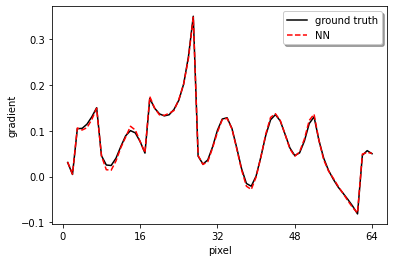

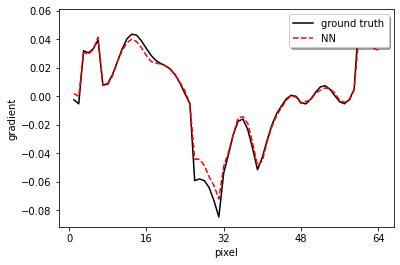

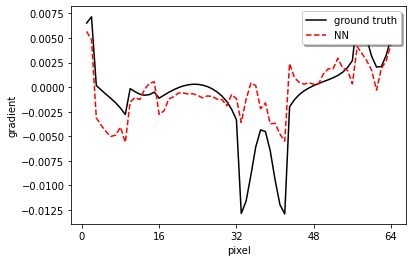

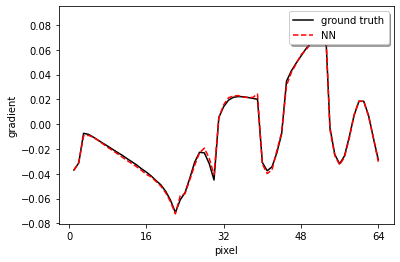

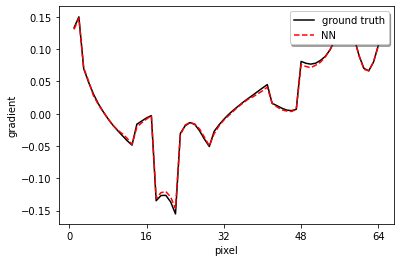

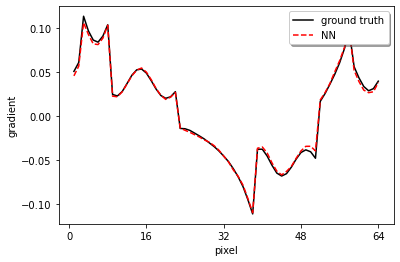

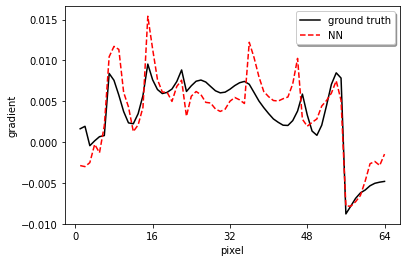

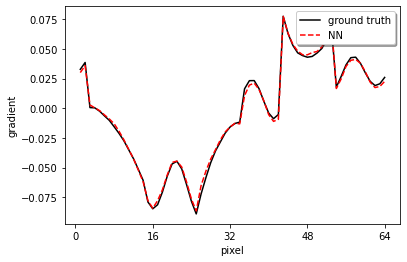

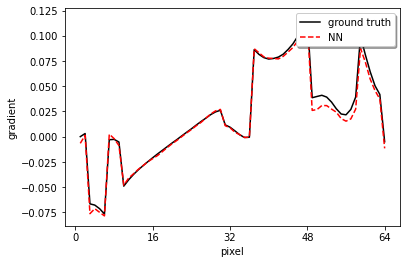

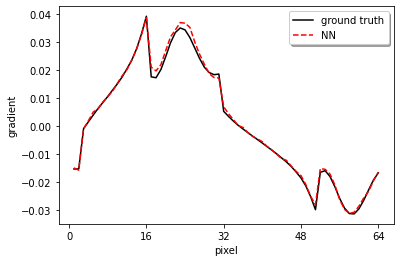

In [18]:
prediction = []
ground_truth =[]
with torch.no_grad():
        for idx, (img, grad) in enumerate(test_loader):
                img, grad = img.to(device), grad.to(device)
                z=model(img).cpu().detach().numpy()
                z=np.squeeze(z,1)
                prediction.append(z)
                g=grad.cpu().detach().numpy()
                g=np.squeeze(g,1)
                #print(g.shape)
                ground_truth.append(g)
x = np.linspace(1, 64, 64)

for i in np.arange(10):
        plt.figure()
        plt.plot(x, ground_truth[0][i,:], label = 'ground truth', color = 'k')
        plt.plot(x, prediction[0][i,:], label = 'NN',ls='dashed', color = 'r')
        plt.xlabel('pixel')
        plt.ylabel('gradient')
        plt.legend(shadow=True, fancybox=True, loc="upper right")
        # plt.xticks([0, 64, 128, 192, 256])
        plt.xticks([0, 16, 32, 48, 64])
        #plt.yticks([0.15,0.2,0.25,0.3,0.35])
        plt.show()

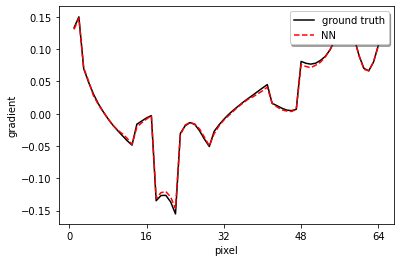

In [23]:
i = 4

plt.figure()
plt.plot(x, ground_truth[0][i,:], label = 'ground truth', color = 'k')
plt.plot(x, prediction[0][i,:], label = 'NN',ls='dashed', color = 'r')
plt.xlabel('pixel')
plt.ylabel('gradient')
plt.legend(shadow=True, fancybox=True, loc="upper right")
plt.xticks([0, 16, 32, 48, 64])
plt.show()

In [20]:
tosave = np.concatenate((img[i,:].cpu().detach().numpy(), ground_truth[0][i,:], prediction[0][i,:]), axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [13]:
a = img[i,:].cpu().detach().numpy()
b = np.expand_dims(ground_truth[0][i,:], 0)
c = np.expand_dims(prediction[0][i,:], 0)

tosave = np.concatenate((a,b,c), axis=0)

NameError: name 'i' is not defined

In [ ]:
np.save('groundTruth.npy', tosave )

In [14]:
from scipy.io import savemat
mdic = {"tosave": tosave}
savemat("matlab_matrix.mat", mdic)


NameError: name 'tosave' is not defined